In [16]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import warnings
import matplotlib.pyplot as plt 

warnings.filterwarnings('ignore')

In [17]:
df =pd.read_csv('monthly-cola-production-in-austr.csv')
df.sample(10)

,Month,Monthly cola production
148,1968-05,114.3
70,1961-11,116.3
367,1986-08,126.6
463,1994-08,143.0
62,1961-03,97.1
358,1985-11,182.0
432,1992-01,147.0
442,1992-11,176.0
195,1972-04,120.0
224,1974-09,169.4


In [18]:
df['Month']=pd.to_datetime(df['Month'])
print(df.info())

df.set_index('Month', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    476 non-null    datetime64[ns]
 1   Monthly cola production  476 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.6 KB
None


In [19]:
df['firstDiff']= df['Monthly cola production'].diff()  #for ARIMA
df['Diff12']= df['Monthly cola production'].diff(12)   #for SARIMAX
print(df.head(15))

            Monthly cola production  firstDiff  Diff12
Month                                                 
1956-01-01                     93.2        NaN     NaN
1956-02-01                     96.0        2.8     NaN
1956-03-01                     95.2       -0.8     NaN
1956-04-01                     77.1      -18.1     NaN
1956-05-01                     70.9       -6.2     NaN
1956-06-01                     64.8       -6.1     NaN
1956-07-01                     70.1        5.3     NaN
1956-08-01                     77.3        7.2     NaN
1956-09-01                     79.5        2.2     NaN
1956-10-01                    100.6       21.1     NaN
1956-11-01                    100.7        0.1     NaN
1956-12-01                    107.1        6.4     NaN
1957-01-01                     95.9      -11.2     2.7
1957-02-01                     82.8      -13.1   -13.2
1957-03-01                     83.3        0.5   -11.9


Arima 

In [25]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


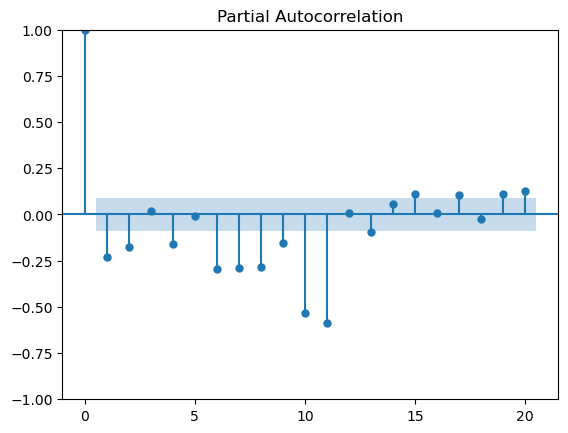

In [21]:
plot_pacf(df['firstDiff'].dropna(), lags=20)
plt.show()

Shaded area is insignificant area
PCAF gives us the auto regressive (ie P)
First 'p' is 1 (the x-axis coordinate), whose value ~0.25
so, significant p values are 1,2,4,6 etc

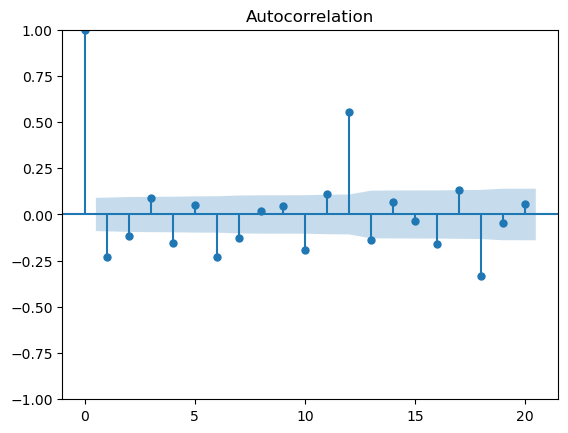

In [22]:
plot_acf(df['firstDiff'].dropna(), lags=20)
plt.show()

Shaded area is insignificant area
CAF gives us the auto regressive (ie q)
First 'q' is 1 (the x-axis coordinate), whose value ~(-0.25)
so, significant p values are 1,2,4,6 etc

Lets take p=1, q=1, d=1

In [23]:
train= df[:round(len(df)*70/100)]
test= df[round(len(df)*70/100):]
print(train.tail())

            Monthly cola production  firstDiff  Diff12
Month                                                 
1983-05-01                    137.3        4.8    22.7
1983-06-01                    135.5       -1.8   -24.1
1983-07-01                    121.7      -13.8   -38.0
1983-08-01                    166.1       44.4     6.7
1983-09-01                    146.8      -19.3   -13.9


In [26]:
model= ARIMA(train['Monthly cola production'], order=(1,1,1))
model_fit=model.fit()

prediction= model_fit.predict(start=test.index[0], end=test.index[-1])

df['ArimaPred']= prediction


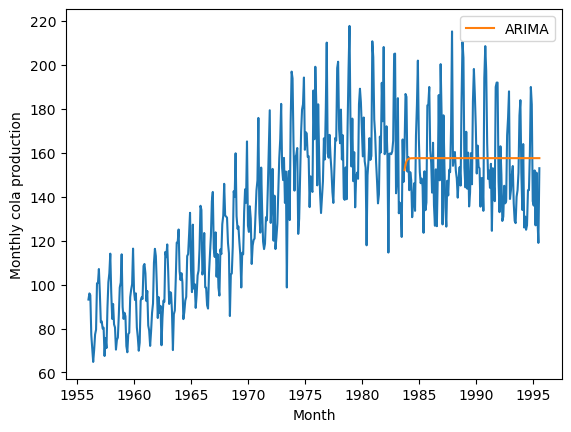

In [28]:
sns.lineplot(data=df, x=df.index, y='Monthly cola production')
sns.lineplot(data=df, x=df.index, y='ArimaPred', label='ARIMA')
plt.legend()
plt.show()

Sarimax

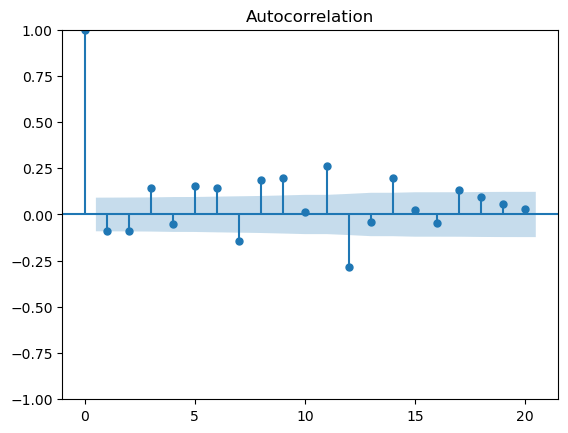

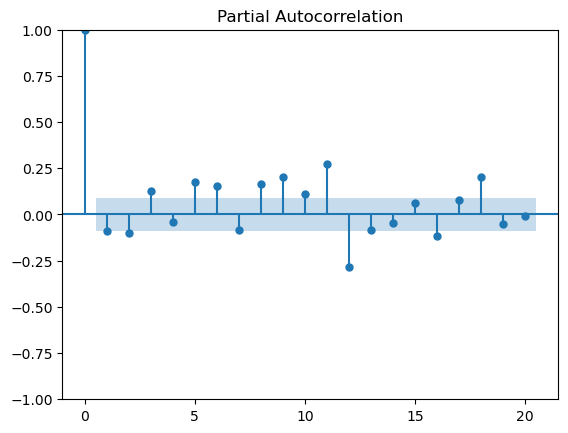

In [29]:
plot_acf(df['Diff12'].dropna(), lags=20)
plt.show()
plot_pacf(df['Diff12'].dropna(), lags=20)
plt.show()